# HMM-RNN Experiments

This notebook demonstrates how to run experiments using the MANAGER class.

In [2]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Import our modules
from scripts.manager import Manager

## Run a Single Experiment

Let's run a single experiment with verbose output to see the training progress.

In [2]:
# Initialize the experiment manager with a small HMM configuration
manager = Manager(config_name="HMMFive_RGRBG")

# Print the configuration
print("Configuration:")
for key, value in manager.config.items():
    print(f"  {key}: {value}")

Created directory structure in Experiments/20250303_235537/HMMFive_RGRBG
Configuration:
  states: 5
  outputs: 3
  stay_prob: 0.95
  target_prob: 0.05
  transition_method: stay_prob
  emission_method: custom
  custom_transition_matrix: None
  custom_emission_matrix: [[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]
  num_seq: 30000
  seq_len: 100
  input_size: 100
  hidden_size: 150
  num_layers: 1
  biased: [False, False]
  batch_size: 4096
  epochs: 700
  learning_rates: [0.001]
  tau: 1.0
  grad_clip: 0.9
  init: True


Starting experiment at 2025-03-03 23:55:38.740208
Configuration saved to Experiments/20250303_235537/HMMFive_RGRBG/config.pkl and Experiments/20250303_235537/HMMFive_RGRBG/config.json
Starting RNN training...
Transition Matrix:
[[0.95  0.05  0.    0.    0.   ]
 [0.025 0.95  0.025 0.    0.   ]
 [0.    0.025 0.95  0.025 0.   ]
 [0.    0.    0.025 0.95  0.025]
 [0.    0.    0.    0.05  0.95 ]]
Using custom emission matrix
Generating HMM data...
Splitting data...
HMM data saved to Experiments/20250303_235537/HMMFive_RGRBG/data/hmm_sequences.pkl
Training with learning rate: 0.001
Training on device: cuda
Epoch [1/700], Train Loss: 51.7037, Val Loss: 50.8584
Epoch [10/700], Train Loss: 50.7511, Val Loss: 50.8880
Epoch [20/700], Train Loss: 50.7784, Val Loss: 50.9267
Epoch [30/700], Train Loss: 50.7920, Val Loss: 50.8970
Epoch [40/700], Train Loss: 50.7942, Val Loss: 50.8352
Epoch [50/700], Train Loss: 50.8628, Val Loss: 50.9088
Epoch [60/700], Train Loss: 50.7483, Val Loss: 50.8046
Epoch [70

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq1_flat = torch.tensor(seq1_flat).float().to(self.device)
/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq2_flat = torch.tensor(seq2_flat).float().to(self.device)


Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...
Generating comparison plots...
Plots saved to Experiments/20250303_235537/HMMFive_RGRBG/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Explained variance ratio: [0.3512779  0.28933683 0.14510876 0.05722686 0.0204895 ]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250303_235537/HMMFive_RGRBG/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250303_235537/HMMFive_RGRBG/figs/latent_trajectory_3d.html
GPU memory cleared
Experiment results saved to Experiments/20250303_235537/HMMFive_RGRBG/results.pkl
Experiment summary saved to Experiments/20250303_235537/HMMFive_RGRBG/summary.json
Experiment completed in 15.50 minutes


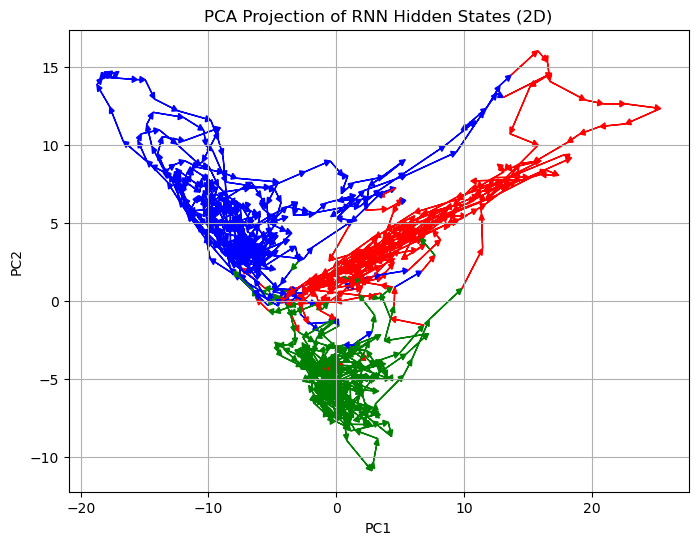

In [3]:
# Run the experiment with verbose output
results = manager.run_experiment(verbose=True)

Created directory structure in Experiments/20250304_013410/HMMFour_RGRB
Running reverse-engineering analysis...
Model loaded from Experiments/20250303_233621/HMMFour_RGRB/models/4HMM_3Outputs_custom_30kData_0.001lr_13.1Loss.pth
Generating RNN sequences for PCA...


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Running PCA...
Explained variance ratio: [0.35123676 0.2941561  0.07565381 0.06863234 0.01815991]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250303_233621/HMMFour_RGRB/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250303_233621/HMMFour_RGRB/figs/latent_trajectory_3d.html
GPU memory cleared


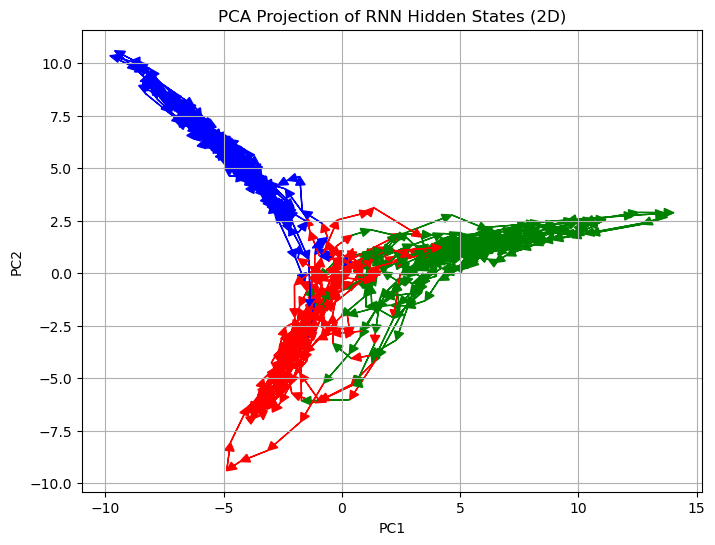

In [4]:
manager = Manager(config_name="HMMFour_RGRB")

# Point to the experiment directory where your model is saved
manager.config_dir = Path("Experiments/20250303_233621/HMMFour_RGRB")
manager.models_path = manager.config_dir / "models"
manager.figs_path = manager.config_dir / "figs"
manager.data_path = manager.config_dir / "data"

pca_results = manager.run_reverse()

## Explore the Results

After the experiment completes, we can explore the results directory.

In [ ]:
# Show the experiment directory structure
import os

def print_directory_tree(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

print_directory_tree("Experiments")

## Running Multiple Experiments

You can also run multiple experiments in sequence.

In [2]:
# Create a new manager
multi_manager = Manager()

# Run multiple experiments
# Only uncommment this if you want to run more lengthy experiments
config_names = ["HMMThree_fully"]
all_results = multi_manager.run_multiple_experiments(config_names, verbose=True)

Created directory structure in Experiments/20250303_000002/CustomConfig
Running experiment with config: HMMThree_fully
Created directory structure in Experiments/20250303_000002/HMMThree_fully
Starting experiment at 2025-03-03 00:00:02.778647
Configuration saved to Experiments/20250303_000002/HMMThree_fully/config.pkl and Experiments/20250303_000002/HMMThree_fully/config.json
Starting RNN training...
Transition Matrix:
[[0.99  0.005 0.005]
 [0.005 0.99  0.005]
 [0.005 0.005 0.99 ]]
Emission Probabilities:
[[9.93307147e-01 6.69285091e-03 2.04735862e-09]
 [6.64835448e-03 9.86703291e-01 6.64835448e-03]
 [2.04735862e-09 6.69285091e-03 9.93307147e-01]]
Generating HMM data...
Splitting data...
HMM data saved to Experiments/20250303_000002/HMMThree_fully/data/hmm_sequences.pkl
Training with learning rate: 0.001
Training on device: cuda
Epoch [1/700], Train Loss: 15.0346, Val Loss: 14.9936
Epoch [10/700], Train Loss: 15.0359, Val Loss: 14.9891
Epoch [20/700], Train Loss: 15.0391, Val Loss: 14.

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq1_flat = torch.tensor(seq1_flat).float().to(self.device)
/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq2_flat = torch.tensor(seq2_flat).float().to(self.device)


Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...


/home/elia/Documents/rnnrep/scripts/test.py:162: RuntimeWarning: invalid value encountered in divide
  trans[i] = mat/mat.sum(axis=1, keepdims=True)
posx and posy should be finite values
posx and posy should be finite values


Generating comparison plots...
Plots saved to Experiments/20250303_000002/HMMThree_fully/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Error running experiment: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Traceback (most recent call last):
  File "/home/elia/Documents/rnnrep/scripts/manager.py", line 493, in run_multiple_experiments
    results = 

In [2]:
from scripts.rnn import RNN

# Load the model
rnn_model = RNN()
rnn_model.load_model("/home/elia/Documents/rnnrep/Experiments/20250303_145528/HMMFour_RGRB/models/4HMM_3Outputs_custom_30kData_0.001lr_9.6Loss.pth")

sequence = rnn_model.gen_seq(1500)

Model loaded from /home/elia/Documents/rnnrep/Experiments/20250303_145528/HMMFour_RGRB/models/4HMM_3Outputs_custom_30kData_0.001lr_9.6Loss.pth


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


In [7]:
sequence["h"][431]

array([0.0000000e+00, 0.0000000e+00, 7.6704666e+37, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.3169626e+38, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.2737834e+38, 1.3306146e+37,
       9.6287292e+37, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.5704130e+38, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 6.3189031e+37, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.5540829e+38, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.7179872e+37,
       9.8515416e+37, 0.0000000e+00, 2.7467970e+37, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.3727048e+37,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.8994467e+38, 0.0000000e+00, 1.0690186e+38, 7.7282629e+36,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 6.3148045e+37, 0.0000000e+00, 5.3836786e+37,
       0.0000000e+00, 0.0000000e+00, 6.8375253e+37, 1.9540000e

In [3]:
nan_locations = np.argwhere(np.isnan(sequence["h"]))
print(f"NaN values appear at the following locations:\n{nan_locations}")


NaN values appear at the following locations:
[[ 434    0]
 [ 434    1]
 [ 434    2]
 ...
 [1499  147]
 [1499  148]
 [1499  149]]


In [ ]:
weights = rnn_model.rnn.weight_ih_l0
values_greater_than = (weights < ).any()
print(f"Contains values greater than: {values_greater_than}")


Contains values greater than: False
